<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#вывод" data-toc-modified-id="вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<a id='1'></a>
## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
df.duplicated().sum()

0

### Вывод

Обнаружено множество пропусков значений. Явных дупликатов не обнаружено. Имеет смысл произвести преобразования типов колонок с ценой и описывающих кол-во, не подразумевающих дробных частей (этажи). Методом describe получили общее представление числовых значений, которые так же показывают нам возможные ошибочные данные(например высота потолка: мин = 1 метр, макс = 100 метр). Рассмотрим их подробнее на этапе предобработки данных.

## Предобработка данных

Для начала пройдемся по всем столбцам, с пропущенными значениями и проанализируем их.

In [7]:
df[(df["ceiling_height"] < 2) | (df["ceiling_height"] > 10)]["ceiling_height"].count()

28

Кроме пропущенных значений, видим и аномальные с высотой потолков 1м и более 10м, что в многоквартирных домах маловероятно. Таких записей не так много, оставим их, но в случае их пригождения в анализе просто отбросим как выбросы. А пропущеные значения заменим медианой, что-бы не было влияния значений из выброса (на среднюю). В целом, такого правила будем придерживаться и для других столбцов.

In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [9]:
df[df["floors_total"].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


86 пропущенных значений, и нельзя сказать что дом одноэтажный, так как в колонке floor указан этаж квартиры, отличающийся от 1. Оставим так и добавим в дальнейшем колонку с группировкой этажности квартир.

In [10]:
df[(df["living_area"].isna()) & (df["kitchen_area"].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23T00:00:00,1,2.55,16.0,NaN,15,NaN,...,NaN,1.0,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,113.0
23642,14,5950000.0,80.3,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0


В 1464 строках нет данных по обоим столбцам (площадь кухни и жилая). В дальнешем добавим колонки с соотношением их к общей площади, на основании которых и заполним их.

In [11]:
df["is_apartment"].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [12]:
df["is_apartment"] = df["is_apartment"].fillna(False)

Пропуски возможно связаны с незнанием значения "аппартаментов", заменим их на False, т.к. они днействительно не часто встречаются.

In [13]:
df["balcony"].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [14]:
df["balcony"] = df["balcony"].fillna(0)

Считаем, что не указание балконов, означает их остутствие.

In [15]:
df["locality_name"] = df["locality_name"].fillna("другой")

Заменим не указаное название города значением "другой".

In [16]:
df[df["airports_nearest"].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [17]:
df_cart = df[["locality_name", "airports_nearest", "cityCenters_nearest", "parks_around3000",  "parks_nearest", "ponds_around3000", "ponds_nearest"]]
df_cart[df_cart["airports_nearest"].isna()]

,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
5,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN
8,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN
12,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN
22,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN
30,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23683,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN
23692,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN
23695,Тосно,NaN,NaN,NaN,NaN,NaN,NaN
23696,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_cart_isnan = df_cart.query("airports_nearest.isna() and cityCenters_nearest.isna() and parks_around3000.isna() and parks_nearest.isna() and ponds_around3000.isna() and ponds_nearest.isna()")

In [19]:
df_cart_isnan["locality_name"].value_counts()

посёлок Мурино            522
Всеволожск                398
Гатчина                   307
деревня Кудрово           299
Выборг                    237
                         ... 
деревня Иссад               1
деревня Меньково            1
деревня Трубников Бор       1
посёлок Высокоключевой      1
поселок Усть-Луга           1
Name: locality_name, Length: 345, dtype: int64

In [20]:
df_cart_isnan[df_cart_isnan["locality_name"] == "Санкт-Петербург"]["locality_name"].count()

61

5518 наблюдений имеют пропуски, пресуще сразу всем столбцам характеризующих растояние. Причем расположенных из них в Санкт-Петербурге всего 61. Можно предположить, что на некоторых местностях такие замеры не проводились. Заменить эти значения не получится.

In [21]:
df['date'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')
df['date'] = df['date'].dt.round('1D')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In [22]:
# создаю новые столбцы по дате
df['weekday'] = df['date'].dt.weekday
df["month"] = df['date'].dt.month
df["year"] = df['date'].dt.year
df['weekday'].value_counts()

3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: weekday, dtype: int64

In [23]:
df[df["days_exposition"].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date,weekday,month,year
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07,3,3,2019
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,...,11634.0,0.0,NaN,0.0,NaN,NaN,2019-04-18,3,4,2019
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,...,11603.0,1.0,620.0,1.0,1152.0,NaN,2018-11-18,6,11,2018
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,...,12872.0,0.0,NaN,0.0,NaN,NaN,2018-12-02,6,12,2018
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,...,12702.0,0.0,NaN,0.0,NaN,NaN,2019-01-31,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,...,11459.0,0.0,NaN,0.0,NaN,NaN,2018-11-02,4,11,2018
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,...,51818.0,0.0,NaN,0.0,NaN,NaN,2019-01-24,3,1,2019
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,2017-03-21,1,3,2017
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-11,6,2,2018


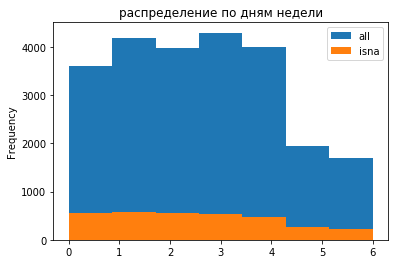

In [24]:
df["weekday"].plot(kind="hist", bins=7, label="all", legend="q")
df[df["days_exposition"].isna()]["weekday"].plot(kind="hist", bins=7, title="распределение по дням недели", label="isna", legend="q")

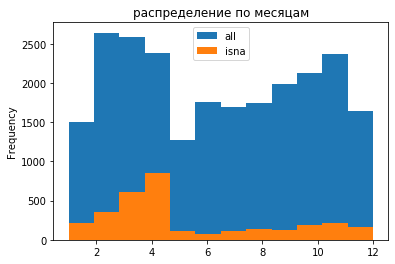

In [25]:
df["month"].plot(kind="hist", bins=12, label="all", legend="q")
df[df["days_exposition"].isna()]["month"].plot(kind="hist", bins=12, title="распределение по месяцам", label="isna", legend="q")

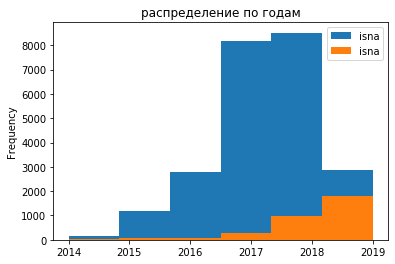

In [26]:
df["year"].plot(kind="hist", bins=6, label="isna", legend="q")
df[df["days_exposition"].isna()]["year"].plot(kind="hist", bins=6, title="распределение по годам", label="isna", legend="q")

In [27]:
df.query("days_exposition.isna() and year==2019")["month"].value_counts()

4    790
3    523
2    272
1    151
5     60
Name: month, dtype: int64

In [28]:
df.query("year==2019")["month"].value_counts()

4    956
3    879
2    557
1    426
5     61
Name: month, dtype: int64

In [29]:
df[df["days_exposition"].isna()]["year"].value_counts()

2019    1796
2018     959
2017     271
2015      70
2016      67
2014      18
Name: year, dtype: int64

In [30]:
df["year"].value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year, dtype: int64

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
date                        0
weekday                     0
month                       0
year                        0
dtype: int64

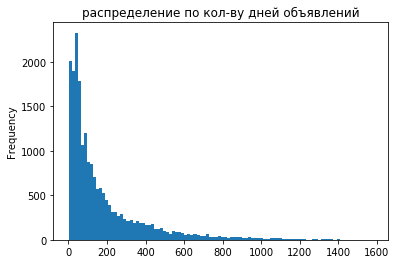

In [31]:
#df["days_exposition"] = df["days_exposition"].fillna(df["days_exposition"].median())
df["days_exposition"].plot(kind="hist", bins=100, title="распределение по кол-ву дней объявлений")
df.isna().sum()

In [32]:
# переводим float в int и где логично в int16
df["last_price"] = df["last_price"].astype(int)
df["floors_total"] = df["floors_total"].astype("UInt16")
df["balcony"] = df["balcony"].astype("UInt16")
df["parks_around3000"] = df["parks_around3000"].astype("UInt16")
df["ponds_around3000"] = df["ponds_around3000"].astype("UInt16")
df["airports_nearest"] = df["airports_nearest"].astype("Int64")
df["cityCenters_nearest"] = df["cityCenters_nearest"].astype("Int64")
df["parks_nearest"] = df["parks_nearest"].astype("Int64")
df["ponds_nearest"] = df["ponds_nearest"].astype("Int64")
df["days_exposition"] = df["days_exposition"].round().astype("Int64")

df["last_price"] = df["last_price"] // 1000 #  в тыс.руб (int)

### Вывод

По итогам предобработки данных мы заменили, где это возможно, часть пропущенных значений на их медианну(высота потолка, кол-во дней публикации), либо 0 в кол-во балконов, false в is_apartment, 'другие' в locality_name. Заменять пропуски в колоннах характеризующих площадь квартир не стали, так как есть риск существенного их искажения и влияния на вывод по ним (например в случае заполнения их медианой, могло получится так, что скажем площадь только кухни была бы в разы больше общей площади квартиры). В дальнейшем постараемся их заполнить путем нахождения среднего соотношения общей площади к кухни и жилой части.

В части картографических данных так-же имеется множество пропусков, которые невозможно заполнить не имея дополнительной информации. Но хорошая новость в том, что непосредственно в г.Санкт-Петербурге таких всего 61. А именно по ниму мы должны  осущесвить основной анализ данных.

Изменили тип данных с вещественного на целочисленный в большинстве численных столбцов, за исключением данных с геометрическими параметрами квартир, где точность критически важна. Так-же для удобства работы создали столбец Date (типа datetime) с измененным форматом даты публикации с точностью до дня.

## Расчёты и добавление результатов в таблицу

In [33]:
df["price_metr"] = df["last_price"] / df["total_area"]

In [34]:
# группировка по этажу
def ft_floor(data):
    if data['floor'] == 1:
        return "первый"
    elif data['floor'] == data['floors_total']:
        return "последний"
    else:
        return "другой"

df['floor_group'] = df.apply(ft_floor, axis=1)
df['floor_group'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_group, dtype: int64

In [35]:
# были несколько Nan в floors_total, их отнесли к категории"другой".
df['floor_group'].count()

23699

In [36]:
df["kitchen_ratio"] = df["kitchen_area"] / df["total_area"]
df["living_ratio"] = df["living_area"] / df["total_area"]
df["kitchen_ratio"] = df["kitchen_ratio"].fillna(df["kitchen_ratio"].mean())
df["living_ratio"] = df["living_ratio"].fillna(df["living_ratio"].mean())
df["kitchen_area"] = df["kitchen_area"].fillna(df["total_area"] * df["kitchen_ratio"])
df["living_area"] = df["living_area"].fillna(df["total_area"] * df["living_ratio"])
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
date                        0
weekday                     0
month                       0
year                        0
price_metr                  0
floor_group                 0
kitchen_ratio               0
living_ratio                0
dtype: int64

### Вывод

На данном этапе мы посчитали и добавили в таблицу цену за кв.м. Провели категоризацию этажа квартиры, а также даты публикации по дню недели, месяцу и году. Расчитали соотношение жилой и кухонной площадей к общей площади квартиры, что позволило заполнить пропущенные значения в соответствующих столбцах.

## Исследовательский анализ данных

Для начала построим гистограммы с параметрами по умолчанию для колонок:  площадь, цена, число комнат, высота потолков. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9eaad4dd0>,
      dtype=object)

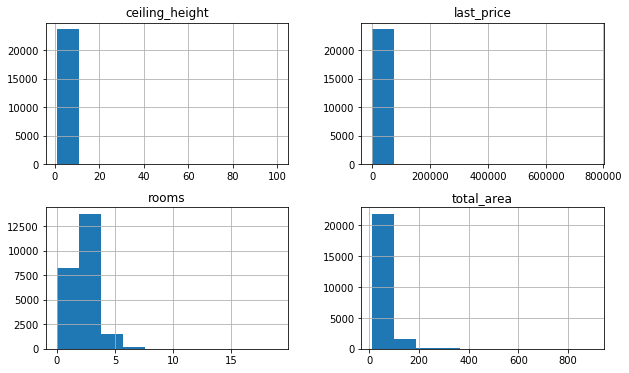

In [37]:
pl = ["total_area", "last_price", "rooms", "ceiling_height"]
df[pl].hist(figsize=(10,6))

Ввиду не лучшей их информативности, сделаем новые, сделанные с фильтрацией на основе данных из метода describe() аномальных значений.

In [38]:
df[pl].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.348651,6541.532723,2.070636,2.724358
std,35.654083,10887.008378,1.078405,0.988298
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.650000
75%,69.900000,6800.000000,3.000000,2.700000
max,900.000000,763000.000000,19.000000,100.000000


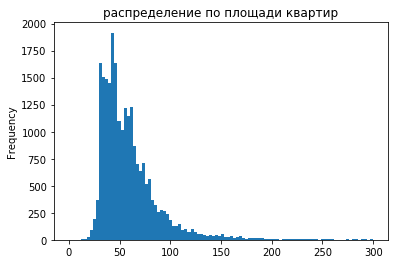

In [39]:
df["total_area"].plot(kind="hist", bins=100, range=(0, 300), title="распределение по площади квартир")

С повышением площади кварир выше 45 метров, их кол-во уменьшается.

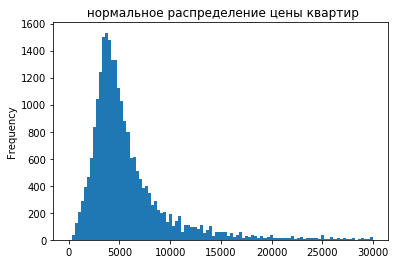

In [40]:
df["last_price"].plot(kind="hist", bins=100, range=(0, 30000), title=" нормальное распределение цены квартир")

Цена  имеет нормально распределение с пиком около 4 млн.руб. и длинным хвостом.
Так же по 2-м гистограммам выше, уже можно говорить о высокой кореляции между ними, но это мы проверим позже.

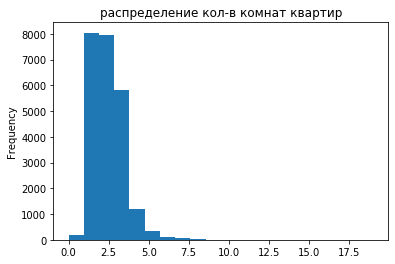

In [41]:
df["rooms"].plot(kind="hist", bins=20, title="распределение кол-в комнат квартир")

Самые распространенные 1 и 2х комнатные квартиры. Кол-во квартир с более чем 3х комнат, намного меньше.

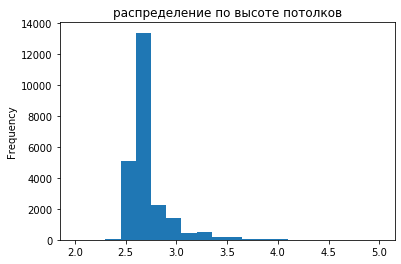

In [42]:
df["ceiling_height"].plot(kind="hist", bins=20, range=(2, 5), title="распределение по высоте потолков")

Наибольшее распространение получили потолки с высотой около 2.8м.

In [43]:
df["days_exposition"].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Средняя - 169 дней, что очень отличается от медианны - 95 дней, т.к. на него оказывает давление выбросы в виде максимальных значений, таких как 1580 дней.

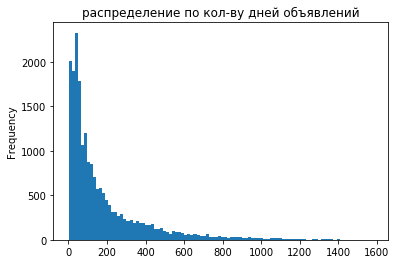

In [44]:
df["days_exposition"].plot(kind="hist", bins=100, title="распределение по кол-ву дней объявлений")

Гистограмма, описывающая кол-во дней размещения объявления имеет вид распределения пуассона, с макс. значениями вначале и уменьшением их по мере увеличения дней. Пик отмеченный на 95 день - результат замены пропусков на медиану.

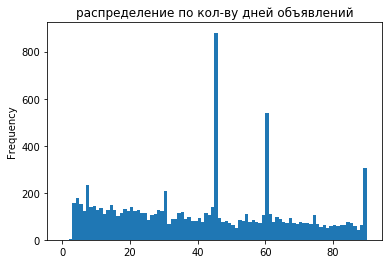

In [45]:
df["days_exposition"].plot(kind="hist", bins=90, range=(0, 90), title="распределение по кол-ву дней объявлений")

Если взять наиболее распространенную выборку, то можно заметить пики на 45, 60 и 90 дней. Возможно это просто связано с особенностями размещения обьявлений на порталах (платой за месяц, по истечении которого объявления снималось, даже если кв. не продалась).

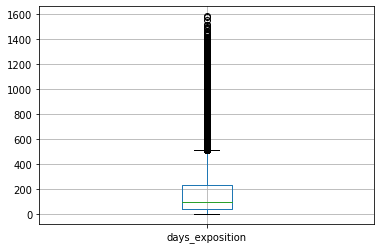

In [46]:
#plt.ylim(0, 500)
df.boxplot(column="days_exposition")

In [47]:
df[df["days_exposition"] < 10]["days_exposition"].count()

1130

Boxplot помогает нам определить как распространенное время продажи до 420 дней. Выше этого значения можем считать необычаемо долгими. А вот выбросов в минимальную сторону не обнаружено, т.к. именно там сосредоточено большинство значений. Если исходить из значений усов boxplot, то при медиане в 95 дней, быстрой будем считать продажи менее 45 дней, а долгой более 200 дней.

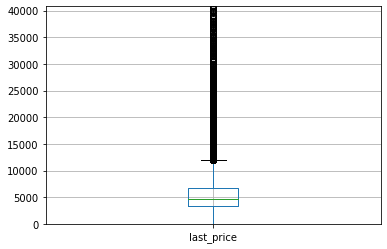

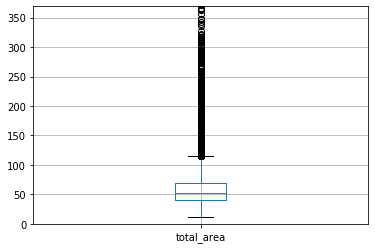

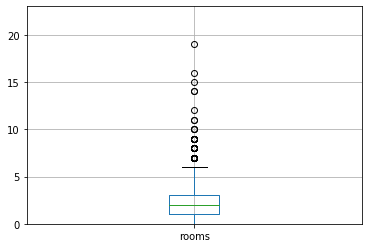

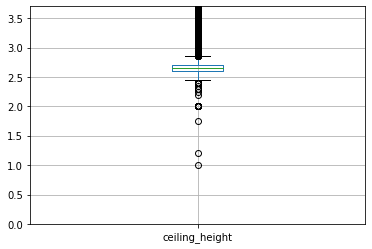

In [48]:
ejection_check = ["last_price","total_area", "rooms", "ceiling_height"]
for check in ejection_check:
    q1 = df[check].quantile(0.25)
    q3 = df[check].quantile(0.75)
    m = q3 + 10 * (q3 - q1)
    plt.ylim(0, m)
    df.boxplot(column=check)
    plt.show()

In [49]:
df = df.query("last_price < 15000 and  (10 < total_area < 150) and rooms < 10 and (2.3 < ceiling_height < 3.5)")
df.shape

(22078, 30)

После фильтрации число наблюдений уменьшилось примерно на 7%.

**Изучим, какие факторы влияют на стоимость квартиры.**

Для общего представления составим матрицу диаграмм рассеяния для параметров, которые нам необходимо проверить.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9ea249690>,
      dtype=object)

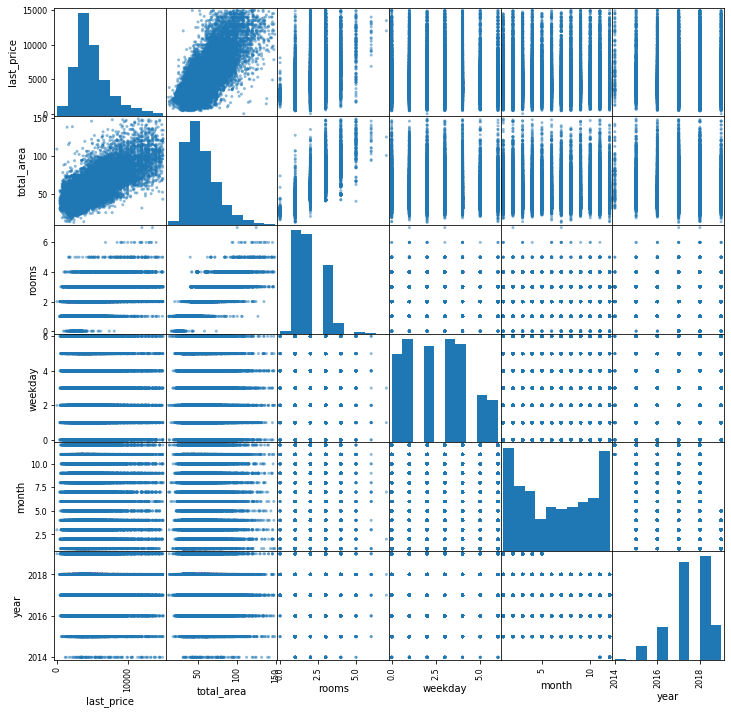

In [50]:
price_table = ["last_price","total_area", "rooms", 'floor_group',  'weekday', 'month', 'year']
price_table2 = df[price_table]
pd.plotting.scatter_matrix(price_table2, figsize=(12, 12)) 

На первый взгляд можно сказать, что есть положительная кореляция цены, от площади кв. и числа комнат. Возможно в зимние месяцы больше дорогих квартир. 

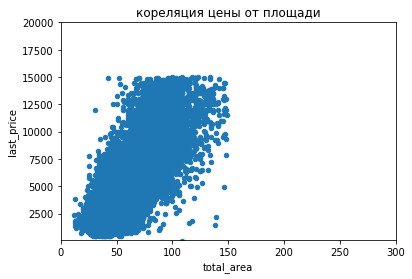

In [51]:
df["last_price"].corr(df["total_area"])
df.plot(x='total_area', y='last_price', kind='scatter',xlim=(0, 300), ylim=(100, 20000), title="кореляция цены от площади")

In [52]:
df["last_price"].corr(df["total_area"])

0.7396997519869456

Как ни странно, но наблюдаем довольно сильную положительную кореляцию цены от площади квартиры.

In [53]:
df["last_price"].corr(df["rooms"])

0.47174941208145366

In [54]:
df["last_price"].corr(~df["cityCenters_nearest"].isna())

0.4514124000407969

От кол-ва комнат и растояния до центра положительная корреляция также есть, но слабее.

In [55]:
df["last_price"].corr(df["weekday"])

-0.012009894044044716

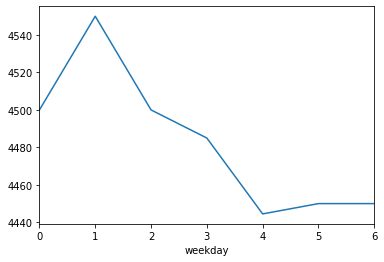

In [56]:
df.groupby("weekday")["last_price"].median().plot()

In [57]:
df["last_price"].corr(df["month"])

0.006556158218531895

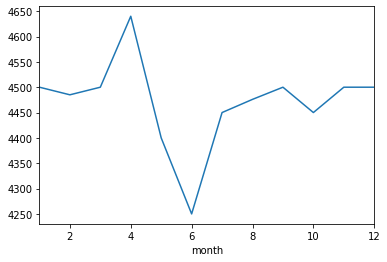

In [58]:
df.groupby("month")["last_price"].median().plot()

In [59]:
df["last_price"].corr(df["year"])

-0.012091522256430275

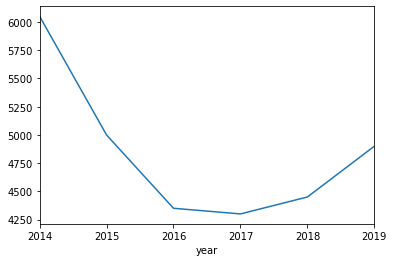

In [60]:
df.groupby("year")["last_price"].median().plot()

Корелляция стоимости квартир с датой продажи не наблюдается.

In [61]:
df.groupby('floor_group')["last_price"].median()

floor_group
другой       4650
первый       3817
последний    4100
Name: last_price, dtype: int64

Видим, что квартиры на 1 этаже самые дешевые, а в середине самые дорогие.

In [62]:
cities = df["locality_name"].value_counts().head(10)
cities

Санкт-Петербург      14220
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             392
Пушкин                 342
Колпино                337
посёлок Парголово      326
Гатчина                305
деревня Кудрово        299
Выборг                 225
Name: locality_name, dtype: int64

,price_metr
locality_name,
Санкт-Петербург,107.086229
Пушкин,101.004335
деревня Кудрово,92.472977
посёлок Парголово,90.332168
посёлок Мурино,85.724655
посёлок Шушары,78.655031
Колпино,75.333117
Гатчина,68.811356
Всеволожск,67.198789


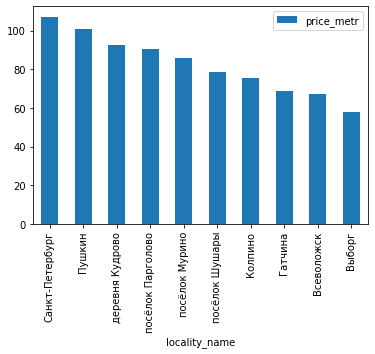

In [63]:
df_cities = df.query("locality_name in @cities.index")
pivot_cities = df_cities.pivot_table(index='locality_name', values="price_metr")
pivot_cities.sort_values("price_metr",ascending=False).plot(kind="bar")
pivot_cities.sort_values("price_metr",ascending=False)

Из городов с наибольшим кол-вом объявлений, наболее высокая стоимость жилья в Санкт-Петербурге, а низкая в Выборге.

In [64]:
df_spb = df.query("locality_name == 'Санкт-Петербург'")
df_spb.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              65
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest          60
cityCenters_nearest       44
parks_around3000          44
parks_nearest           7991
ponds_around3000          44
ponds_nearest           7279
days_exposition         1673
date                       0
weekday                    0
month                      0
year                       0
price_metr                 0
floor_group                0
kitchen_ratio              0
living_ratio               0
dtype: int64

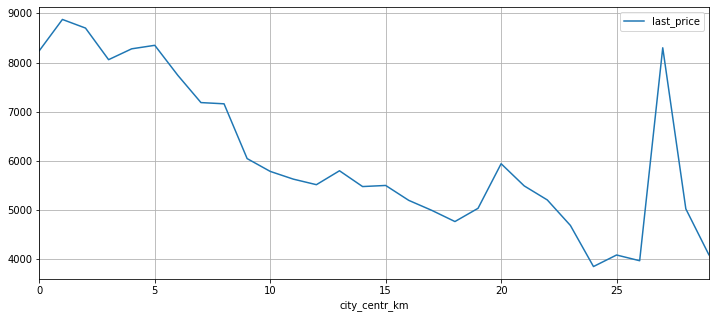

In [65]:
df_spb = df_spb.dropna(subset=["cityCenters_nearest"])
df_spb["city_centr_km"] = (df_spb["cityCenters_nearest"] / 1000).round().astype(int)
df_spb.pivot_table(index="city_centr_km", values="last_price").plot(grid=True, figsize=(12, 5))

По графику зависимости средней цены квартиры от удаленности от центра (км) видно, что цена начинает заметно расти ближе 9км, что может указывать на границу города, а при растоянии ближе 3 км видим резкий ее излом и рост. Расстоянием 3км и будем отличать центр города от остальной части.

**Изучим подробнее центр города.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9e854ed10>,
      dtype=object)

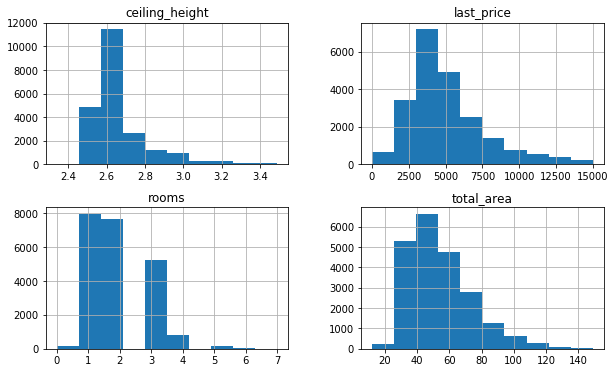

In [66]:
df_centr = df_spb[df_spb["city_centr_km"] <= 3]
pl = ["total_area", "last_price", "rooms", "ceiling_height"]
df[pl].hist(figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9e835a710>,
      dtype=object)

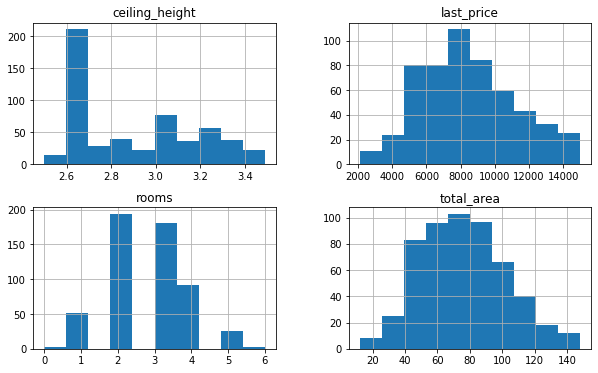

In [67]:
df_centr[pl].hist(figsize=(10,6))

In [68]:
df[pl].describe()

,total_area,last_price,rooms,ceiling_height
count,22078.000000,22078.000000,22078.000000,22078.000000
mean,54.404337,5079.377616,1.957741,2.668245
std,20.205528,2614.452409,0.924705,0.152679
min,12.000000,12.000000,0.000000,2.340000
25%,39.200000,3350.000000,1.000000,2.600000
50%,50.000000,4500.000000,2.000000,2.650000
75%,65.000000,6200.000000,3.000000,2.700000
max,149.000000,14999.000000,7.000000,3.490000


In [69]:
df_centr[pl].describe()

,total_area,last_price,rooms,ceiling_height
count,548.000000,548.000000,548.000000,548.000000
mean,75.743266,8433.633212,2.713504,2.890858
std,26.102261,2752.155616,1.049088,0.263906
min,12.000000,2100.000000,0.000000,2.500000
25%,56.150000,6437.500000,2.000000,2.650000
50%,74.000000,8200.000000,3.000000,2.810000
75%,93.075000,10100.000000,3.000000,3.100000
max,148.000000,14990.000000,6.000000,3.490000


- Мы можем сказать, что в центре площадь квартир в среднем больше в 1,5 раза, чем во всей генеральной совокупности.
- Кол-во комнат в квартире в центре в среднем на 1 больше, чем во всей генеральной совокупности. 
- Высота потолков в центре в среднем выше на 35 см. 
- Цена квартиры в центре выше более чем в 2 раза.

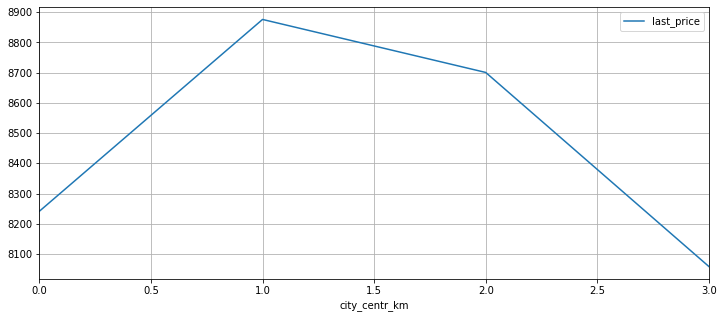

In [70]:
df_centr.pivot_table(index="city_centr_km", values="last_price").plot(grid=True, figsize=(12, 5))

In [71]:
df_centr["city_centr_km"].corr(df_centr["last_price"])

-0.11523083308156501

Существует обратная корелляция стоимости квартиры от расстояния до центра, т.е. с увеличением расстояния цена уменьшается.

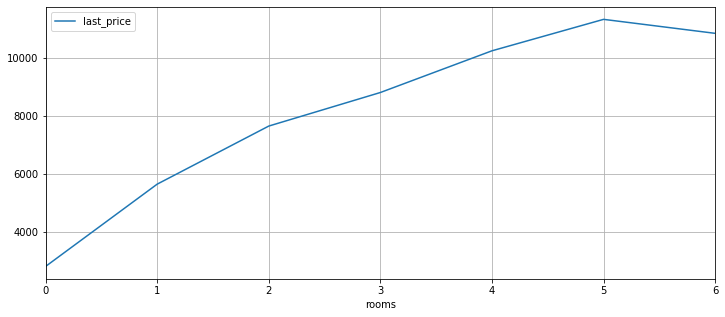

In [72]:
df_centr.pivot_table(index="rooms", values="last_price").plot(grid=True, figsize=(12, 5))

In [73]:
df_centr["rooms"].corr(df_centr["last_price"])

0.5224739843592001

Чем больше комнат, тем выше цена.

In [74]:
df_centr["ceiling_height"].corr(df_centr["last_price"])

0.12080388762239565

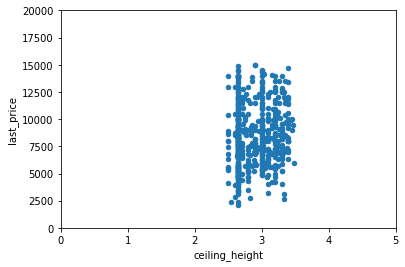

In [75]:
df_centr.plot(x="ceiling_height", y='last_price', kind='scatter',xlim=(0, 5), ylim=(0, 20000))

Значимой кореляции цены от высоты потолка не обнаружено.

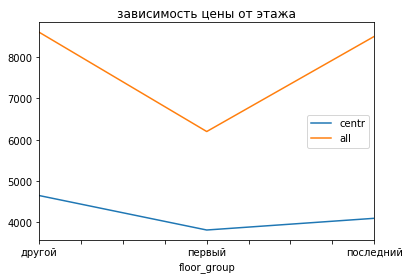

In [76]:
df.groupby('floor_group')["last_price"].median().plot(label="centr", legend="q", title="зависимость цены от этажа")
df_centr.groupby('floor_group')["last_price"].median().plot(label="all", legend="q")
plt.show()

Так же как и для всей выборки, для центра характерны низкие цены на 1-м этаже и высокие на других.

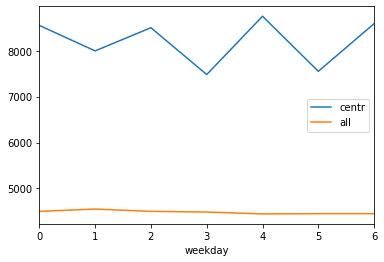

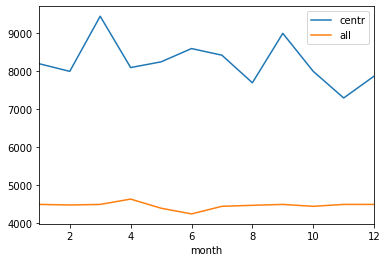

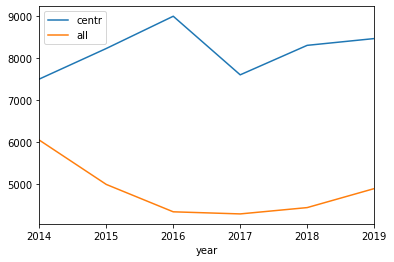

In [77]:
for time in ["weekday", "month", "year"]:
    df_centr.groupby(time)["last_price"].median().plot(label="centr", legend="q")
    df.groupby(time)["last_price"].median().plot(label="all", legend="q")
    plt.show()

Значимой зависимомти стоимости квартир от даты размещения объявления не обнаружено, но некоторые закономерности присущие ко всей совокупности характерны и для центра города (просадка цен в летние месяцы и в 2014-2015 годах).

### вывод

На цену квартиры влияет большое кол-во факторов, однако главным из них является площадь. Значимым для стоимости является также число комнат, расстояние до центра города, которые имеют положительную кореляцию со стоимостью. Крайние этажи дешевле средних. 

Самым дорогим по стоимости квартир является город Санкт-Петербург, а самым дешевым Выборг. Причем географическое расположение также является значимым фактором, при ее приближении к центру стоимость увел-ся, а на растоянии ближе 3 км этот рост ускоряется, что и позволило нам обазначить эту область как центр города. 

Кварирам в центре по сравнению с другими характерны большая площадь, высота потолка, кол-во комнат, что так-же значительно увеличивает ее стоимость.
Только 25% квартир проданы в течении 45 дней со дня публикации объявления, столько же спустя 420 дней, что можно считать быстрой и долгой продажей соответственно. Значимой кореляции цены квартиры от даты размещения объявлений не обнаружено, но выявленные закономерности (летом ценая ниже, снижени в 2014-2015 годах) характерны как центру города, так и всей генеральной совокупности.

## Общий вывод

**По итогу предобработки данных.**

В полученных данных имелось большое кол-во пропусков. В данных, заполненных пользователем их меньше, эти пропуски удалось успешно заменить, однако данную работу можно автоматизировать и заполнять пропуски геометрических параметров (высота потолка, кол-во этажей) на основе базы данных недвижимости. В картографических данных пропусков больше, однако лишь малая их часть была в пределах Санкт-Петербурга, что позволило качественно провести анализ в пределах города. Тем не менее, стоит доработать возможность сбора данных за пределами Санкт-Петербурга.
Также в большинстве параметрах были найдены выбивающиеся значения, однако их влияние было минимизировано использованием медианных значением выборок.

**По итогу анализа данных.**

Основной фактор влияющий на стоимость квартиры - её площадь.

Другие значимые факторы:
- количество комнат
- этаж (крайние этажи дешевле средних)
- расстояние до центра

С уменьшением расстояния до центра города, стоимость квартиры увеличивается. В пределах 3 км от центра города эта зависимость усиливается, что и было нами интерпретировано в качестве центра Санкт-Петербурга. Ее подробное изучение позволяет сказать, что по сравнению со всей совокупностью данных, ей характерны:
- большая площадь
- большее кол-во комнат
- большая высота потолков

Не смотря на разницу в абсолютных величинах, закономерности выявленные для центра города, также характерны и для всех данных. Было выявлено снижение стоимости в 2014-2017 годах с дальнейшим увеличение, а также некоторое снижение цен в летние месяцы.
Половина квартир из данных было продано в течении 3 месяцев.